# Gold Loan Prediction

## Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data Collection and Pre Processing 

In [2]:
gold_data = pd.read_csv(r"/Users/akshatgarg/Downloads/Gold Loan Prediction/gold_price_dataset.csv")
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# statistical measure of the data 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
# 25% of the value is less than 1239.87

## Correlation 
### 1. Positive Correlation
### 2. Negative Correlation

In [9]:
correlation = gold_data.corr()

<AxesSubplot:>

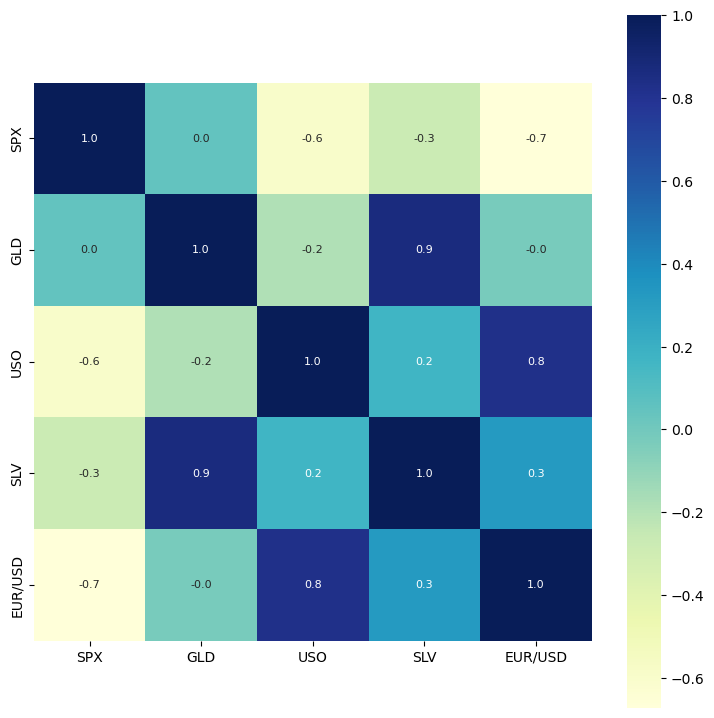

In [23]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (9,9))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='YlGnBu')

### As we can clearly observe that silver and spx are positively correlated with gold wheresas and uso and eur/usd  are negatively correlated with gold.


In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


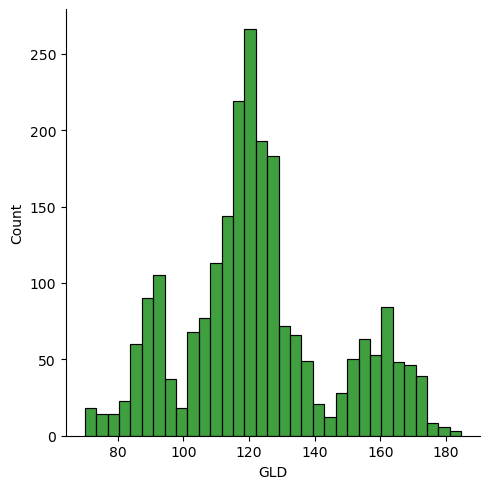

In [12]:
# Checking the distribution of the GLD price 
sns.displot(gold_data['GLD'], color="green")

## Splitting the Features and Target 

In [13]:
X = gold_data.drop(['Date', 'GLD'], axis =1)
Y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


##  Splitting into Training data and Testing data 

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

## Model Training : Random Forest Regressor 

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
# Training the model 
regressor.fit(X_train,Y_train)

RandomForestRegressor()

## Model Evalutation

In [19]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.70719912  82.0818997  116.27240013 127.69550062 120.86240121
 154.7713975  150.44209876 126.15030058 117.45149869 125.89540073
 116.69490117 171.63940079 141.91849842 168.01499829 115.1729003
 117.49210027 139.65660257 170.25970128 159.05630274 159.66199913
 155.14790064 125.58439985 176.27049968 157.21010379 125.16610033
  93.78199958  77.28690063 120.47220008 119.17959964 167.46029926
  88.09430054 125.24949997  91.20380081 117.69729994 121.06969924
 136.04440038 115.31140139 115.49830103 148.04019994 107.15930102
 104.48250241  87.19299781 126.39980046 118.02260038 153.14559922
 119.6123001  108.47300005 108.22809837  93.19910057 127.06949761
  74.9472007  113.67799933 121.20600009 111.23459909 118.90959891
 120.74729941 158.92329935 168.1384006  146.95759657  85.67489848
  94.37840018  86.80359908  90.52750036 118.98270069 126.43850063
 127.52139978 169.18289956 122.22549903 117.34039865  98.33580036
 168.28810092 143.26719821 132.0313026  121.164802   121.11229944
 119.618600

In [20]:
# comparing predicted values to actual values 
# R squared error 
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9893371915227471


## Compare the actual values and the predicted values in a plot 

In [21]:
Y_test = list(Y_test)

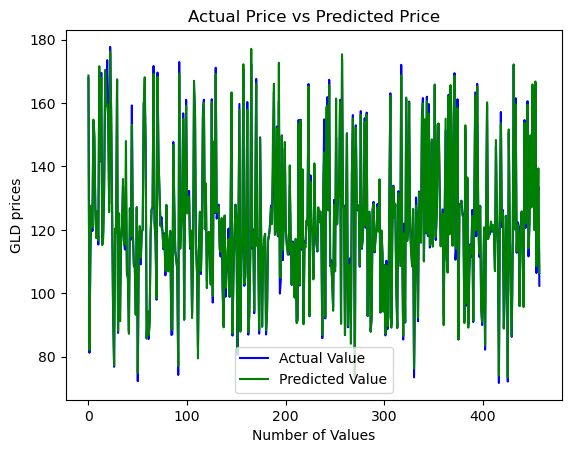

In [22]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='Green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD prices')
plt.legend()
plt.show()